##### Required libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier

##### Importing data

In [17]:
data_for_model=pd.read_csv('E:/DataSkills 2021/Imarticus DSP/Capstone Project/HR Analytics/hr_16_17_for_model.csv')
data_for_testing=pd.read_csv('E:/DataSkills 2021/Imarticus DSP/Capstone Project/HR Analytics/hr_17_18_for_model_testing.csv')

In [18]:
print(data_for_model.head())
print(data_for_testing.head())

   Employee Position         0         1         2         3         4  \
0                  2  0.598599 -0.678322  0.213095  1.103943  4.151661   
1                  2  0.737623 -0.804680 -0.153812  0.509581  2.296818   
2                  2  0.766296 -0.099903 -0.227193  0.375850  1.600320   
3                  2  0.683751 -1.248109  0.164174 -0.114499  4.859332   
4                  1 -0.438864 -1.442746 -0.471798 -0.887169  4.028750   

          5         6         7  Current Status  
0 -0.903766 -0.948556  5.202559               0  
1  0.881904 -1.107437  5.701115               0  
2  0.395981 -0.464127  5.076898               0  
3 -0.379653 -1.513537  5.202559               0  
4  1.103138 -1.579085  6.043362               0  
   Employee Position         0         1         2         3         4  \
0                  1  0.762908 -1.011578  0.015799 -0.039001  5.330795   
1                  2  0.768915 -0.585556  0.137515 -0.849394  2.093404   
2                  2  0.514900  0

### Model Building

##### SMOTE  - Synthetic Minority Oversampling Technique

##### train data

In [19]:
sm = SMOTE(random_state=19)
X_train, y_train = sm.fit_resample(data_for_model.drop('Current Status',axis=1),data_for_model['Current Status'])

y_train.value_counts(normalize=True)

1    0.5
0    0.5
Name: Current Status, dtype: float64

##### test data

In [20]:
X_test = data_for_testing.drop('Current Status',axis=1)

y_test = data_for_testing['Current Status']

##### Logistic Regression

In [21]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

hr_predict=clf.predict(X_test)
hr_predict_df=pd.DataFrame({'Test Data':y_test,'Prediction':hr_predict}) 
# hr_predict_df.rename(columns={'index':'Employee No'},inplace=True)

cm=confusion_matrix(y_test, hr_predict)
print(cm)

#print({'tn':cm[0,0],'fp':cm[0,1],'fn':cm[1,0],'tp':cm[1,1]})

''' {'tn': 483, 'fp': 4, 'fn': 3, 'tp': 92} '''

#hr_predict_df.loc[~(hr_predict_df['Test Data']==hr_predict_df['Prediction'])]

print(classification_report(y_test,hr_predict))

[[654 174]
 [ 33 112]]
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       828
           1       0.39      0.77      0.52       145

    accuracy                           0.79       973
   macro avg       0.67      0.78      0.69       973
weighted avg       0.87      0.79      0.81       973



In [11]:
hr_predict_df.head()

,Test Data,Prediction
0,0,0
1,0,1
2,0,0
3,1,1
4,0,0


Logistic Regression ROC AUC = 0.848


Text(0, 0.5, 'True Positive Rate')

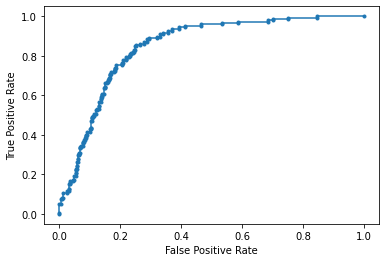

In [22]:
# ROC-AUC curve analysis
clf_probs = clf.predict_proba(X_test)[:,1]

#hr_predict_df['Test'].replace({'Active':0,'Resigned':1},inplace=True)
#hr_predict_df['Prediction'].replace({'Active':0,'Resigned':1},inplace=True)

print('Logistic Regression ROC AUC = %.3f' % roc_auc_score(hr_predict_df['Test Data'], clf_probs))

fpr, tpr, thresholds = roc_curve(hr_predict_df['Test Data'], clf_probs)

plt.plot(fpr,tpr,marker='.',label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

##### K-Nearest Neighbor (KNN)

Text(0, 0.5, 'Mean Error')

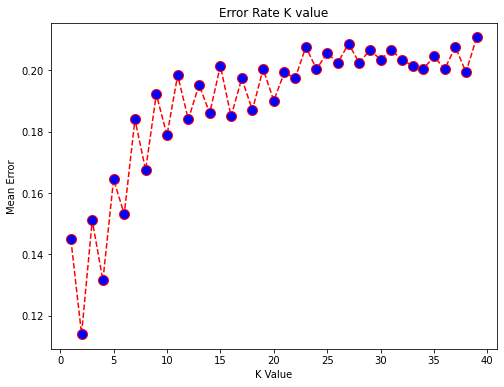

In [26]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
# elbow methos
error=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(8,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',
         markerfacecolor='blue',markersize=10)
plt.title('Error Rate K value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

##### KNN is not the correct algorithm for this problem

##### Random Forest

In [27]:
clf_rf = RandomForestClassifier(max_depth=12,random_state=0)
clf_rf.fit(X_train,y_train)

hr_predict_rf = clf_rf.predict(X_test)
hr_predict_rf_df=pd.DataFrame({'Test Data':y_test,'Prediction':hr_predict_rf}) #.reset_index()
# hr_predict_rf_df.rename(columns={'index':'Employee No'},inplace=True)

cm_rf=confusion_matrix(y_test, hr_predict_rf)
print(cm_rf)

#print({'tn':cm_rf[0,0],'fp':cm_rf[0,1],'fn':cm_rf[1,0],'tp':cm_rf[1,1]})

#hr_predict_rf_df.loc[~(hr_predict_rf_df['Test Data']==hr_predict_rf_df['Prediction'])]

print(classification_report(y_test,hr_predict_rf))

[[763  65]
 [ 30 115]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       828
           1       0.64      0.79      0.71       145

    accuracy                           0.90       973
   macro avg       0.80      0.86      0.82       973
weighted avg       0.91      0.90      0.91       973



#### Random Forest Classifier is performing better than the Logistic Regression
We will do GridsearchCV done to find the best hyper-parametric values. We will check if inputting the optimum parameter values in the Random Forest model would improve  the accuracy along with the other indicators of the model.

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth' : [8,10,12,15,20],
             'n_estimators': [200, 500]}

gridF = GridSearchCV(estimator=clf_rf, param_grid=param_grid, cv = 3, verbose = 1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [40]:
gridF.best_params_

{'max_depth': 12, 'n_estimators': 200}

In [42]:
clf_rf = RandomForestClassifier(max_depth=12,n_estimators= 200,random_state=0)
clf_rf.fit(X_train,y_train)

hr_predict_rf = clf_rf.predict(X_test)
hr_predict_rf_df=pd.DataFrame({'Test Data':y_test,'Prediction':hr_predict_rf}) #.reset_index()
# hr_predict_rf_df.rename(columns={'index':'Employee No'},inplace=True)

cm_rf=confusion_matrix(y_test, hr_predict_rf)
print(cm_rf)

#print({'tn':cm_rf[0,0],'fp':cm_rf[0,1],'fn':cm_rf[1,0],'tp':cm_rf[1,1]})

#hr_predict_rf_df.loc[~(hr_predict_rf_df['Test Data']==hr_predict_rf_df['Prediction'])]

print(classification_report(y_test,hr_predict_rf))

[[766  62]
 [ 28 117]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       828
           1       0.65      0.81      0.72       145

    accuracy                           0.91       973
   macro avg       0.81      0.87      0.83       973
weighted avg       0.92      0.91      0.91       973



Random Forests ROC AUC = 0.915


Text(0, 0.5, 'True Positive Rate')

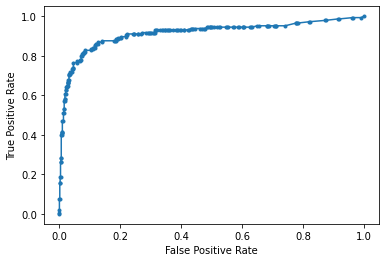

In [46]:
# ROC-AUC curve analysis
clf_rf_probs = clf_rf.predict_proba(X_test)[:,1]

#hr_predict_df['Test'].replace({'Active':0,'Resigned':1},inplace=True)
#hr_predict_df['Prediction'].replace({'Active':0,'Resigned':1},inplace=True)

print('Random Forests ROC AUC = %.3f' % roc_auc_score(hr_predict_rf_df['Test Data'], clf_rf_probs))

fpr, tpr, thresholds = roc_curve(hr_predict_rf_df['Test Data'], clf_rf_probs)

plt.plot(fpr,tpr,marker='.',label='Random Forests')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')